## Artificial Neural Network (ANN)

In [1]:
#pip install tensorflow-gpu

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.16.1


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
X.shape, y.shape

((10000, 11), (10000,))

In [12]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [13]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,True,False,False
898,523,40,2,102967.41,1,1,0,128702.10,False,False,False
2398,706,42,8,95386.82,1,1,1,75732.25,False,True,False
5906,788,32,4,112079.58,1,0,0,89368.59,False,False,True
2343,706,38,5,163034.82,2,1,1,135662.17,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,False,False,False
2899,586,35,7,0.00,2,1,0,70760.69,False,False,False
9549,578,36,1,157267.95,2,1,0,141533.19,False,True,True
2740,650,34,4,142393.11,1,1,1,11276.48,True,False,True


In [14]:
X_train.shape

(8000, 11)

In [15]:
X_test.shape

(2000, 11)

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_train[0]

array([ 0.16958176, -0.46460796,  0.00666099, -1.21571749,  0.8095029 ,
        0.64259497, -1.03227043,  1.10643166, -0.5698444 ,  1.74309049,
       -1.09168714])

In [19]:
# Part 2 - Now let's make the ANN!

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [21]:
# Initialising the ANN
classifier = Sequential()

In [22]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [23]:
# Adding the input layer and the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [24]:
# Adding the input layer and the third hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [25]:
#optimizer='adam': This specifies the optimization algorithm used to update the weights of the neural network during training.
#some optiizers are: 
#SGD (Stochastic Gradient Descent)
#RMSprop (Root Mean Square Propagation)
#Adagrad (Adaptive Gradient Algorithm)
#Nadam (Nesterov Adam)

#loss='binary_crossentropy': This specifies the loss function used to measure how well the model is performing. 

#metrics=['accuracy']: This specifies the metric(s) used to evaluate the performance of the model during training and testing.

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=15)

Epoch 1/15
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7856 - loss: 2.3140 - val_accuracy: 0.7645 - val_loss: 1.7668
Epoch 2/15
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7753 - loss: 1.5509 - val_accuracy: 0.7656 - val_loss: 1.3323
Epoch 3/15
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7768 - loss: 1.1196 - val_accuracy: 0.7739 - val_loss: 0.8896
Epoch 4/15
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7756 - loss: 0.7157 - val_accuracy: 0.7796 - val_loss: 0.5845
Epoch 5/15
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7825 - loss: 0.5320 - val_accuracy: 0.7887 - val_loss: 0.5408
Epoch 6/15
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7849 - loss: 0.5060 - val_accuracy: 0.7955 - val_loss: 0.5185
Epoch 7/15
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7961 - loss: 0.5056 - val_accuracy: 0.7982 - val_loss: 0.5118
Epoch 8/15
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8007 - loss: 0.4835 - val_accuracy: 0.

In [27]:
# list all data in history

print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


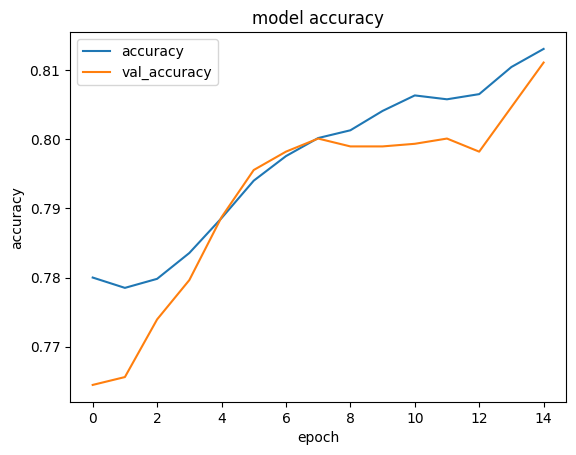

In [28]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

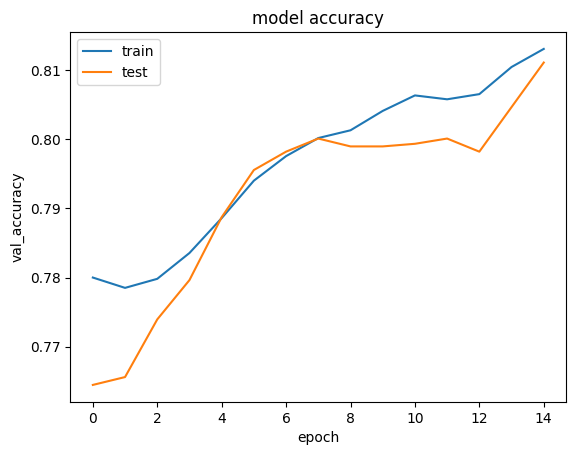

In [29]:
# summarize history for val_accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
model_history.history['accuracy']

[0.7799962759017944,
 0.7785034775733948,
 0.7798096537590027,
 0.7835416793823242,
 0.7885799407958984,
 0.7939913868904114,
 0.7975368499755859,
 0.8001492619514465,
 0.8012688755989075,
 0.8040679097175598,
 0.8063071370124817,
 0.8057473301887512,
 0.8064937591552734,
 0.8104124069213867,
 0.8130248188972473]

In [31]:
model_history.history['val_accuracy']

[0.7644831538200378,
 0.7656190991401672,
 0.7739492654800415,
 0.7796289324760437,
 0.7887163758277893,
 0.7955319881439209,
 0.798182487487793,
 0.8000757098197937,
 0.7989398241043091,
 0.7989398241043091,
 0.7993184328079224,
 0.8000757098197937,
 0.798182487487793,
 0.8046194911003113,
 0.8110564351081848]

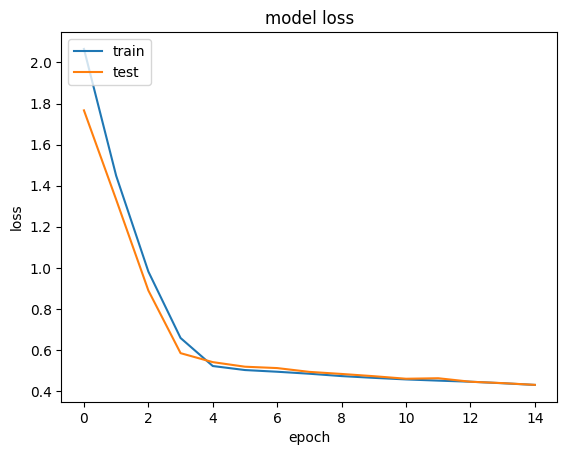

In [32]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
model_history.history['loss']

[2.065960168838501,
 1.4484272003173828,
 0.9818847179412842,
 0.6583030223846436,
 0.5218362212181091,
 0.5022361874580383,
 0.49400055408477783,
 0.4843257963657379,
 0.4728275239467621,
 0.4642331600189209,
 0.45661279559135437,
 0.4507322609424591,
 0.44544699788093567,
 0.4380185008049011,
 0.4298219680786133]

In [34]:
model_history.history['val_loss']

[1.7667733430862427,
 1.3323429822921753,
 0.8896217346191406,
 0.5844995975494385,
 0.5407549142837524,
 0.5185150504112244,
 0.5118499398231506,
 0.49331986904144287,
 0.48324936628341675,
 0.4723057150840759,
 0.4599206745624542,
 0.4623676538467407,
 0.4453519582748413,
 0.4385816156864166,
 0.4301098585128784]

In [35]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [36]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [37]:
y_test.value_counts()

Exited
0    1595
1     405
Name: count, dtype: int64

In [38]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [39]:
import numpy as np

# Assuming y_pred is a 2D NumPy array with shape (2000, 1)
y_pred_flattened = np.ravel(y_pred)  # Flatten the 2D array into a 1D array

# Now you can use the value_counts() method
unique_values, value_counts = np.unique(y_pred_flattened, return_counts=True)
result = dict(zip(unique_values, value_counts))
print(result)

{False: 1885, True: 115}


In [44]:
y_pred_flattened

array([False, False, False, ..., False, False, False])

In [40]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1564,   31],
       [ 321,   84]], dtype=int64)

In [41]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [42]:
score

0.824

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1595
           1       0.73      0.21      0.32       405

    accuracy                           0.82      2000
   macro avg       0.78      0.59      0.61      2000
weighted avg       0.81      0.82      0.78      2000

